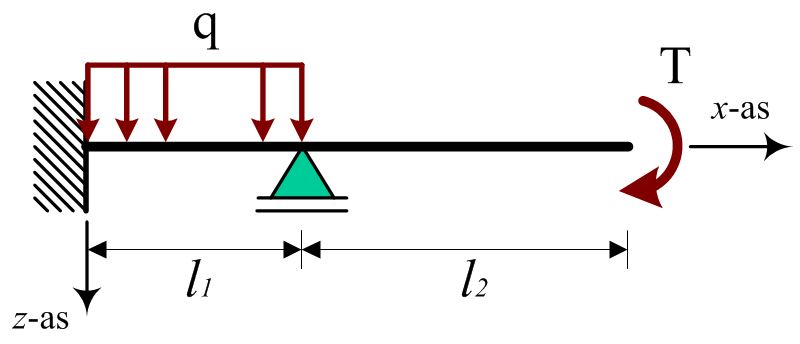

In [6]:
import sympy as sp
x, C1, C2, C3, C4, C5, C6, C7, C8, q, T, EI, L1, L2 = sp.symbols('x C1 C2 C3 C4 C5 C6 C7 C8 q T EI L1 L2')

Definieer de verplaatsingen $w_1$ en $w_2$. 

$w_1$ voor $0 < x < L_1$

$w_2$ voor $L_1 < x < L_1+L_2$

In [7]:
w1 = sp.nsimplify(q * x**4 / (24 * EI) + 1/6 * C1 * x**3 + 1/2 * C2 * x**2 + C3 * x + C4)

In [8]:
w2 = sp.nsimplify(1/6 * C5 * x**3 + 1/2 * C6 * x**2 + C7 * x + C8)

Druk de verdraaiingen ($\phi$), de momenten ($M$) en de dwarskrachten ($V$) uit in $w_1$ en $w_2$.

$\phi_1$, $\kappa_1$, $M_1$, $V_1$ voor $0 < x < L_1$

$\phi_2$, $\kappa_2$, $M_2$, $V_2$ voor $L_1 < x < L_1+L_2$

In [9]:
phi1 = -w1.diff(x)
phi2 = -w2.diff(x)
kappa1 = phi1.diff(x)
kappa2 = phi2.diff(x)
M1 = EI * kappa1
M2 = EI * kappa2
V1 = M1.diff(x)
V2 = M2.diff(x)

Geef de rand- en overgangsvoorwaarden om de onbekenden ($C_1$ t/m $C_8$) op te lossen. (8 onbekenden, dus 8 vergelijkingen nodig).

In [10]:
eq1 = sp.Eq(phi1.subs(x,0),0)
eq2 = sp.Eq(w1.subs(x,0),0)
eq3 = sp.Eq(w1.subs(x,L1),0)
eq4 = sp.Eq(w2.subs(x,L1),0)
eq5 = sp.Eq(phi1.subs(x,L1),phi2.subs(x,L1))
eq6 = sp.Eq(M1.subs(x,L1),M2.subs(x,L1))
eq7 = sp.Eq(V2.subs(x,L1+L2),0)
eq8 = sp.Eq(M2.subs(x,L1+L2),-T)

Laat Maple de 8 onbekenden oplossen met behulp van de 8 hierboven gegeven vergelijkingen.

In [11]:
sol = sp.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8),(C1,C2,C3,C4,C5,C6,C7,C8))
display(sol)
w1_sol = w1.subs(sol)
phi1_sol = phi1.subs(sol)
M1_sol = M1.subs(sol)
V1_sol = V1.subs(sol)
w2_sol = w2.subs(sol)
phi2_sol = phi2.subs(sol)
M2_sol = M2.subs(sol)
V2_sol = V2.subs(sol)

{C1: (-5*L1**2*q + 12*T)/(8*EI*L1),
 C2: (L1**2*q - 4*T)/(8*EI),
 C3: 0,
 C4: 0,
 C5: 0,
 C6: T/EI,
 C7: (-L1**3*q - 36*L1*T)/(48*EI),
 C8: (L1**4*q + 12*L1**2*T)/(48*EI)}

In [12]:
w1_sub = w1_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
phi1_sub = phi1_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
M1_sub = M1_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
V1_sub = V1_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
w2_sub = w2_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
phi2_sub = phi2_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
M2_sub = M2_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])
V2_sub = V2_sol.subs([(T,50),(L1,4),(L2,2),(q,15),(EI,1000)])

Nu kunnen we de twee velden aan elkaar plakken, zodat je een gehele zakkings-, momenten- en dwarskrachtenlijn van de constructie krijgen.

In [13]:
w = sp.Piecewise((w1_sub,(x>=0) & (x<=4)),(w2_sub,(x>4)&(x<=6)))
phi = sp.Piecewise((phi1_sub,(x>=0) & (x<=4)),(phi2_sub,(x>4)&(x<=6)))
M = sp.Piecewise((M1_sub,(x>=0) & (x<=4)),(M2_sub,(x>4)&(x<=6)))
V = sp.Piecewise((V1_sub,(x>=0) & (x<=4)),(V2_sub,(x>4)&(x<=6)))
display(w)
display(phi)
display(M)
display(V)

Piecewise((x**4/1600 - x**3/320 + x**2/400, (x >= 0) & (x <= 4)), (x**2/40 - 17*x/100 + 7/25, (x <= 6) & (x > 4)))

Piecewise((-x**3/400 + 3*x**2/320 - x/200, (x >= 0) & (x <= 4)), (17/100 - x/20, (x <= 6) & (x > 4)))

Piecewise((-15*x**2/2 + 75*x/4 - 5, (x >= 0) & (x <= 4)), (-50, (x <= 6) & (x > 4)))

Piecewise((75/4 - 15*x, (x >= 0) & (x <= 4)), (0, (x <= 6) & (x > 4)))

Je kunt checken of het klopt. Zijn de momenten $M_1$ en $M_2$ nu hetzelfde op $x = 3m$? Ja! Je kunt natuurlijk alle andere rand- en overgangsvoorwaarden ook checken.

In [14]:
display(M1_sub.subs(x,4).evalf())
display(M2_sub.subs(x,4).evalf())

-50.0000000000000

-50.0000000000000

Ook kunnen we de lijnen $w$, $\phi$, $V$ en $M$ plotten in Python

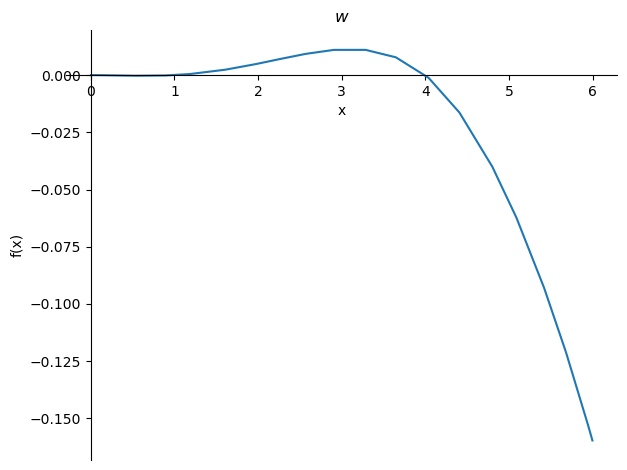

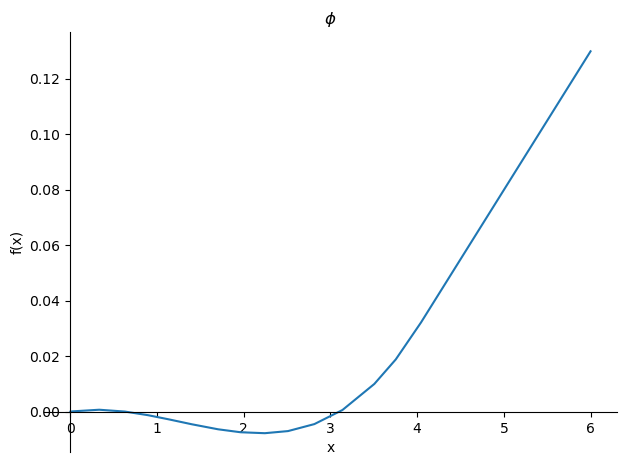

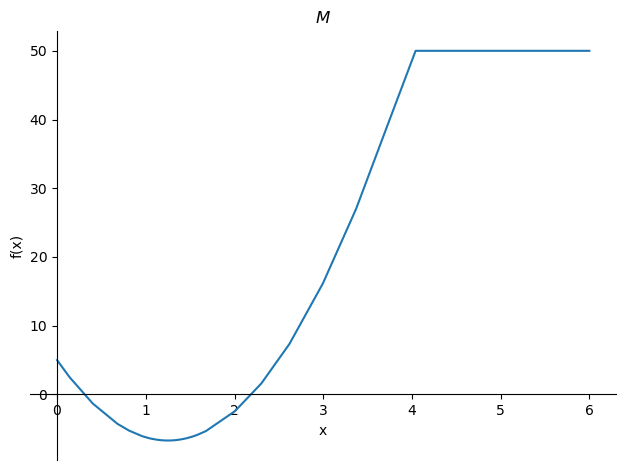

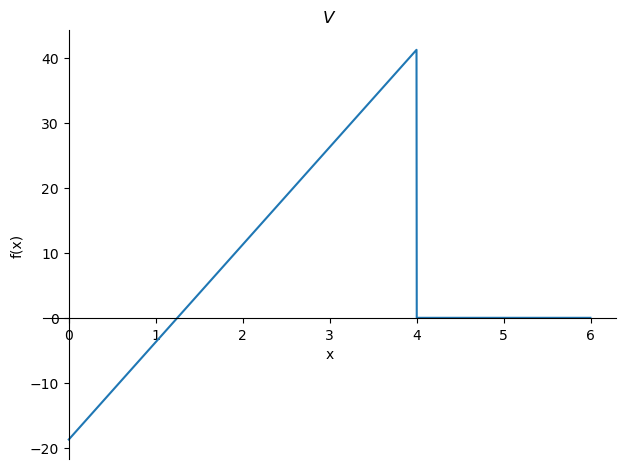

In [15]:
sp.plot(-w,title='$w$');
sp.plot(-phi,title='$\phi$');
sp.plot(-M,title='$M$');
sp.plot(-V,title='$V$');